In [1476]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

import time
start = time.time()

In [1477]:
def get_data2(filename):    
    data = pd.read_csv(filename) #, names=["Interval","kWh"])
    return data

In [1478]:
def conso_byhour(day):
    ''' 
    display conso by hour for the chosen day
    '''
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))

    conso_hours = conso_day.copy()
    conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
    conso_hours#.info()
    # group by hour
    groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
    groupedbyhour.count()
    len(groupedbyhour)
    x = np.arange(1,len(groupedbyhour)+1)

    #groupedbyhour.count().plot(grid=True,xticks=x)
    plt.figure(figsize=(12, 8),facecolor='darkcyan')
    values = groupedbyhour.count().kWh
    #ax = plt.bar(x,groupedbyhour.count().kWh)
    ax = values.plot(kind="bar",color='green',width=.8)
    ax.set_facecolor('antiquewhite')
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) - {day}')
    plt.xlim(-1,len(x)+1)
    plt.xticks(rotation=30);
    
    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in values]
    
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",
            fontfamily='calibri', fontsize=16, fontweight='bold', color='blue'
        )
    
    
def from_csv(csv_file): 
    ''' save data to csv  '''
    df = pd.read_csv(csv_file)
    return df
    
def to_csv(csv_file, df):
    ''' read data from csv'''
    df.to_csv(csv_file, index=False)

def period(p=1):
    ''' 
    give the time of conso for a 1kWh window in a day
    p =  ordinal window ex: p=1 first kWh, p=2 second kWh ..
    df is the data from midnight, each entry is 1 watt
    as the length of df is the total conso in watt,
    we have len(df)/1000 = number of windows of 1 KWh since midnight
    the last window may not be 1000 watt long !
    '''
    if p==1:
        start = df.iloc[0].dates
    else:
        start = df.iloc[(p-1)*1000-1].dates
    if len(df)>p*1000:
        end = df.iloc[p*1000-1].dates
        conso = p*1000
    else:
        end = df.iloc[len(df)-1].dates
        conso = len(df) - (p-1)*1000
    period = end - start  # type timedelta
    hours = int(period / dt.timedelta(hours=1))
    mins = int(period / dt.timedelta(minutes=1)) - hours*60
    secs = int(period / dt.timedelta(seconds=1)) - hours*3600 - mins*60

    #df.iloc[1001:2000]['dates']#.tail(1)
    #print(period)
    print(f'{start}\t{end}\t{hours}h {mins}m {secs}s \t{conso}')


### conso.csv créé par pi4 node-red onglet Linky

In [1479]:
conso_file = r"\\192.168.0.175\pihome\Documents\conso2.csv"
conso_data = get_data2(conso_file)
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728686 entries, 0 to 1728685
Data columns (total 2 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Interval  int64  
 1   kWh       float64
dtypes: float64(1), int64(1)
memory usage: 26.4 MB


In [1480]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1728681    0.14
1728682    0.13
1728683    0.14
1728684    0.13
1728685    0.13
Name: kWh, Length: 1728686, dtype: float64

In [1481]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1728681    0.14
1728682    0.13
1728683    0.14
1728684    0.13
1728685    0.13
Name: kWh, Length: 1728686, dtype: float64

In [1482]:
l=len(conso_data)-1
l

1728685

In [1483]:
conso_data['sec']=conso_data['Interval']/1000


In [1484]:
conso_data['Wh']=3600000/conso_data['Interval']


In [1485]:
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

In [1486]:
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728686 entries, 0 to 1728685
Data columns (total 5 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Interval   int64  
 1   kWh        float64
 2   sec        float64
 3   Wh         float64
 4   cumul(ms)  int64  
dtypes: float64(3), int64(2)
memory usage: 65.9 MB


In [1487]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms)
1728681,26630,0.14,26.630,135.185881,42640881549
1728682,26719,0.13,26.719,134.735581,42640908268
1728683,26653,0.14,26.653,135.069223,42640934921
1728684,26766,0.13,26.766,134.498991,42640961687
1728685,26731,0.13,26.731,134.675096,42640988418


In [1488]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)  # convert to microseconds
cumtime

42640988418000

In [1489]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début

datetime.datetime(2023, 8, 21, 20, 9, 52, 651976)

In [1490]:
conso_data['cumul(ms)'][conso_data['cumul(ms)'].isna()==True]

Series([], Name: cumul(ms), dtype: int64)

In [1491]:
conso_data.iloc[0]


Interval     21934.00000
kWh              0.16000
sec             21.93400
Wh             164.12875
cumul(ms)    21934.00000
Name: 0, dtype: float64

# Recréer les dates à partir des cumuls par impulsion


In [1492]:
base

datetime.datetime(2023, 8, 21, 20, 9, 52, 651976)

In [1493]:
# create column 'dates' with time cumulated time from base
conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]
conso_data['dates']

0         2023-08-21 20:10:14.585976
1         2023-08-21 20:10:36.443976
2         2023-08-21 20:10:58.444976
3         2023-08-21 20:11:20.372976
4         2023-08-21 20:11:42.263976
                     ...            
1728681   2024-12-27 08:51:14.200976
1728682   2024-12-27 08:51:40.919976
1728683   2024-12-27 08:52:07.572976
1728684   2024-12-27 08:52:34.338976
1728685   2024-12-27 08:53:01.069976
Name: dates, Length: 1728686, dtype: datetime64[ns]

## créer les dates

In [1494]:
# create column 'days' avec format 'dd/mm/yy'
conso_data['days']= [d.strftime('%d/%m/%y') for d in conso_data['dates']]    
#[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 20:10:14.585976,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 20:10:36.443976,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 20:10:58.444976,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 20:11:20.372976,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 20:11:42.263976,21/08/23
...,...,...,...,...,...,...,...
1728681,26630,0.14,26.630,135.185881,42640881549,2024-12-27 08:51:14.200976,27/12/24
1728682,26719,0.13,26.719,134.735581,42640908268,2024-12-27 08:51:40.919976,27/12/24
1728683,26653,0.14,26.653,135.069223,42640934921,2024-12-27 08:52:07.572976,27/12/24
1728684,26766,0.13,26.766,134.498991,42640961687,2024-12-27 08:52:34.338976,27/12/24


### save conso_data with dates

In [1495]:
#to_csv(r'../conso_data_with_dates.csv',conso_data)

# tranche journalière


In [1496]:
now = datetime.now()
month = now.month
year = now.year
date = now.day
today = now.strftime('%d/%m/%y')    #str(now.month)+'-'+str(now.day)
today, date, month, year


('27/12/24', 27, 12, 2024)

In [1497]:
here = now.strftime('%H:%M:%S')
here

'08:53:47'

In [1498]:
conso_day = conso_data[conso_data['days']==today]
# save to file
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [1499]:
conso_day.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1036 entries, 1727650 to 1728685
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1036 non-null   int64         
 1   kWh        1036 non-null   float64       
 2   sec        1036 non-null   float64       
 3   Wh         1036 non-null   float64       
 4   cumul(ms)  1036 non-null   int64         
 5   dates      1036 non-null   datetime64[ns]
 6   days       1036 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 64.8+ KB


In [1500]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
#grouped
# count elements in each group => conso in watts => convert to kW
df_grp = grouped.count()/1000



In [1501]:
data = list(df_grp['kWh'])
print(data)

[0.696, 3.701, 4.231, 3.677, 4.124, 4.558, 3.611, 3.444, 3.507, 3.699, 3.609, 3.951, 4.259, 3.642, 3.632, 3.631, 3.322, 3.383, 4.149, 4.04, 4.067, 3.981, 3.475, 4.359, 3.835, 3.762, 4.182, 4.723, 3.952, 3.223, 3.166, 3.899, 3.783, 3.109, 3.781, 4.16, 3.677, 3.674, 4.676, 4.27, 4.466, 3.817, 3.443, 4.302, 3.876, 3.822, 3.479, 4.044, 3.687, 3.413, 4.156, 3.378, 3.853, 3.854, 3.633, 3.75, 4.275, 3.277, 3.884, 3.06, 2.055, 2.042, 2.387, 4.077, 3.679, 4.345, 3.594, 3.958, 3.753, 3.808, 4.107, 4.064, 3.704, 3.128, 3.766, 3.571, 3.607, 3.668, 3.676, 3.312, 3.837, 3.257, 3.75, 3.657, 4.07, 3.564, 3.423, 3.727, 4.117, 4.331, 3.941, 4.156, 4.267, 3.772, 3.925, 3.826, 3.929, 3.701, 4.032, 4.403, 3.881, 3.508, 3.681, 3.669, 3.348, 3.843, 3.993, 4.11, 3.503, 4.162, 3.593, 3.972, 4.627, 3.637, 3.504, 3.563, 4.059, 3.803, 4.084, 3.974, 3.755, 3.596, 5.097, 3.743, 3.761, 4.226, 4.146, 4.559, 4.422, 4.118, 3.677, 4.371, 4.74, 4.129, 4.788, 4.39, 3.683, 4.174, 3.749, 3.696, 3.488, 3.952, 3.69, 3.705, 3.

In [1502]:
# save to file
import pickle
path = r'kwh_mean.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

In [1503]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
def show(day,pltcolor='darkcyan',bgcolor="ivory"):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
    #=[x.hour for x in conso_day['dates']]
    df = conso_day.set_index('heure')
    here = now.strftime('%H:%M:%S')
    conso_jour=len(df['kWh'])
    here, len(df)/1000, conso_jour

    # consommation d'une journée entière à partir de minuit
    # Set background color of the outer 
    # area of the plt
    #plt.figure(facecolor=fgcolor)
    fig, ax = plt.subplots(facecolor=pltcolor)
    
    major_ticks=300;minor_ticks=100
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
    # the size of A4 paper
    fig.set_size_inches(10, 5)
    
    # set bg color
    ax.set_facecolor(bgcolor)
    plt.plot(df['kWh'])
    #plt.plot(conso_day['heure'],conso_day['kWh'])
    plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
    plt.grid()
    plt.xticks(rotation=30);


In [1504]:
df = conso_data
len(df)

1728686

In [1505]:
period(p=2)

2023-08-22 02:16:28.388976	2023-08-22 09:20:44.008976	7h 4m 15s 	2000


In [1506]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean

kWh    0.295307
dtype: float64

In [1507]:
mean=(grouped.count()/1000).mean()
mean

kWh    3.492295
dtype: float64

In [1508]:
last=df_grp.iloc[-1]['kWh']
last

1.036

In [1509]:
conso_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1036 entries, 1727650 to 1728685
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1036 non-null   int64         
 1   kWh        1036 non-null   float64       
 2   sec        1036 non-null   float64       
 3   Wh         1036 non-null   float64       
 4   cumul(ms)  1036 non-null   int64         
 5   dates      1036 non-null   datetime64[ns]
 6   days       1036 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 64.8+ KB


In [1510]:
# select day
day = today
#day = '16/08/24'


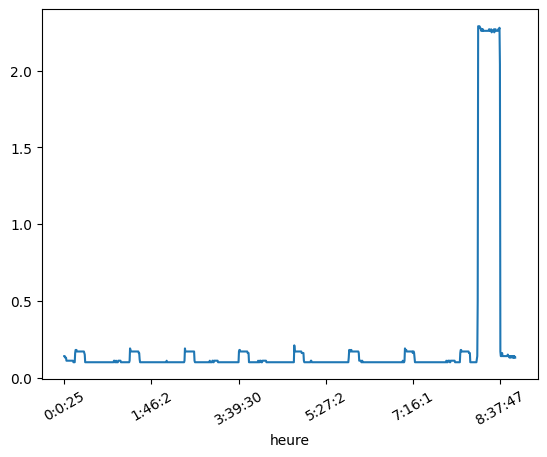

In [1511]:
conso_day=conso_data[conso_data['days']==day].copy()  # no more error
conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
df= conso_day.set_index('heure')
df.tail(2000)['kWh'].plot()
plt.xticks(rotation=30);
#conso_day['heure']


In [1512]:
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 20:10:14.585976,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 20:10:36.443976,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 20:10:58.444976,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 20:11:20.372976,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 20:11:42.263976,21/08/23
...,...,...,...,...,...,...,...
1728681,26630,0.14,26.630,135.185881,42640881549,2024-12-27 08:51:14.200976,27/12/24
1728682,26719,0.13,26.719,134.735581,42640908268,2024-12-27 08:51:40.919976,27/12/24
1728683,26653,0.14,26.653,135.069223,42640934921,2024-12-27 08:52:07.572976,27/12/24
1728684,26766,0.13,26.766,134.498991,42640961687,2024-12-27 08:52:34.338976,27/12/24


In [1513]:
df

,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:25,26090,0.14,26.090,137.983902,42609033198,2024-12-27 00:00:25.849976,27/12/24
0:0:51,25343,0.14,25.343,142.051059,42609058541,2024-12-27 00:00:51.192976,27/12/24
0:1:17,26752,0.13,26.752,134.569378,42609085293,2024-12-27 00:01:17.944976,27/12/24
0:1:46,28431,0.13,28.431,126.622349,42609113724,2024-12-27 00:01:46.375976,27/12/24
0:2:14,28491,0.13,28.491,126.355691,42609142215,2024-12-27 00:02:14.866976,27/12/24
...,...,...,...,...,...,...,...
8:51:14,26630,0.14,26.630,135.185881,42640881549,2024-12-27 08:51:14.200976,27/12/24
8:51:40,26719,0.13,26.719,134.735581,42640908268,2024-12-27 08:51:40.919976,27/12/24
8:52:7,26653,0.14,26.653,135.069223,42640934921,2024-12-27 08:52:07.572976,27/12/24


In [1514]:
# group by hour, df  = data of a chosen day
df_byhour = df[['days','kWh']].groupby('heure', sort=False)
kwh_byhour = df_byhour['kWh']



Max : 23/12/24 5.091
Min : 21/12/24 2.989


,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
1727650,26090,0.14,26.090,137.983902,42609033198,2024-12-27 00:00:25.849976,27/12/24,0:0:25
1727651,25343,0.14,25.343,142.051059,42609058541,2024-12-27 00:00:51.192976,27/12/24,0:0:51
1727652,26752,0.13,26.752,134.569378,42609085293,2024-12-27 00:01:17.944976,27/12/24,0:1:17
1727653,28431,0.13,28.431,126.622349,42609113724,2024-12-27 00:01:46.375976,27/12/24,0:1:46
1727654,28491,0.13,28.491,126.355691,42609142215,2024-12-27 00:02:14.866976,27/12/24,0:2:14
...,...,...,...,...,...,...,...,...
1728681,26630,0.14,26.630,135.185881,42640881549,2024-12-27 08:51:14.200976,27/12/24,8:51:14
1728682,26719,0.13,26.719,134.735581,42640908268,2024-12-27 08:51:40.919976,27/12/24,8:51:40
1728683,26653,0.14,26.653,135.069223,42640934921,2024-12-27 08:52:07.572976,27/12/24,8:52:7
1728684,26766,0.13,26.766,134.498991,42640961687,2024-12-27 08:52:34.338976,27/12/24,8:52:34


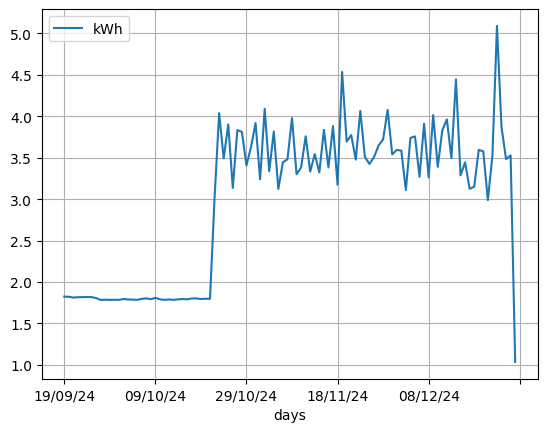

In [1515]:

# premier kWh
if len(df)>1000:
    df.iloc[1000]['dates']
df.iloc[0].dates
df.dates.dt.time

# save data
df_grp.to_csv('df_grp.csv')
df.to_csv('df.csv')
df_grp.to_csv('conso_day_from_20230821.csv')

#df.info()
#df_grp.info()
df_grp.mean()
#df_grp.head()
df_grp.tail(14)
df_grp.tail(100).mean()
df_grp.tail(100).plot()
plt.grid()
# max min during last month
#print(df_grp.iloc[-31:-1])
df_grp.iloc[-31:-1].describe()

month = df_grp.iloc[-31:-1]['kWh']
print('Max :',month.idxmax(), max(month))
print('Min :',month.idxmin(), min(month))
conso_day


2024-12-27 00:00:25.849976	2024-12-27 08:37:45.664976	8h 37m 19s 	1000
2024-12-27 08:37:45.664976	2024-12-27 08:53:01.069976	0h 15m 15s 	36
<class 'pandas.core.frame.DataFrame'>
Index: 1036 entries, 1727650 to 1728685
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1036 non-null   int64         
 1   kWh        1036 non-null   float64       
 2   sec        1036 non-null   float64       
 3   Wh         1036 non-null   float64       
 4   cumul(ms)  1036 non-null   int64         
 5   dates      1036 non-null   datetime64[ns]
 6   days       1036 non-null   object        
 7   heure      1036 non-null   object        
 8   hours      1036 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 80.9+ KB


('27/12/24', <Axes: xlabel='hours'>)

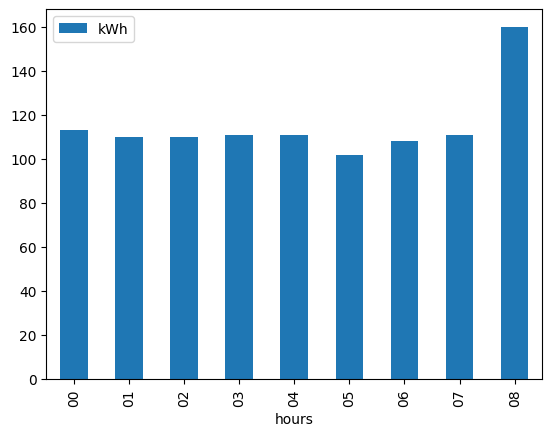

In [1516]:

tranches = len(df)//1000
tranches+1
# temps de conso par tranches de 1kwh
for p in range(1,tranches+2):  # les 5 tranches de kWh consommés
    if len(df)>(p-1)*1000:
        period(p)
# conso temps réel
here = now.strftime('%H:%M:%S')
conso_jour=len(df['kWh'])
here, len(df)/1000, conso_jour
#add hours column for a chosen day
conso_hours = conso_day.copy()
conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
conso_hours.info()

conso_hours
# group conso of the day by hour
groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
list(groupedbyhour)
day, groupedbyhour.count().plot.bar()

In [1517]:
df_grp

,kWh
days,
21/08/23,0.696
22/08/23,3.701
23/08/23,4.231
24/08/23,3.677
25/08/23,4.124
...,...
23/12/24,5.091
24/12/24,3.869
25/12/24,3.483


In [1518]:
# select number of days to display
span = 30
#df_grp.tail(span)


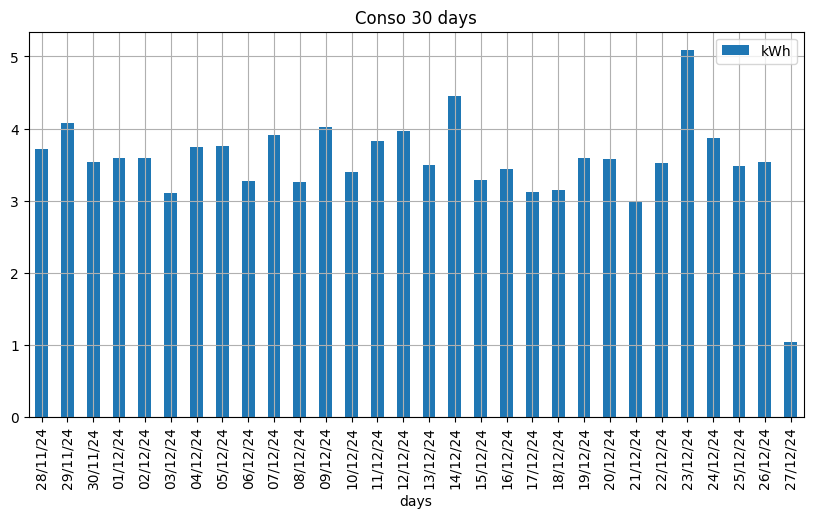

In [1519]:

# Plot the figure without labels
df_grp.tail(span).plot.bar(grid=True, figsize=(10, 5), layout='tight') 
plt.title(f'Conso {span} days')
plt.xticks(rotation=90);


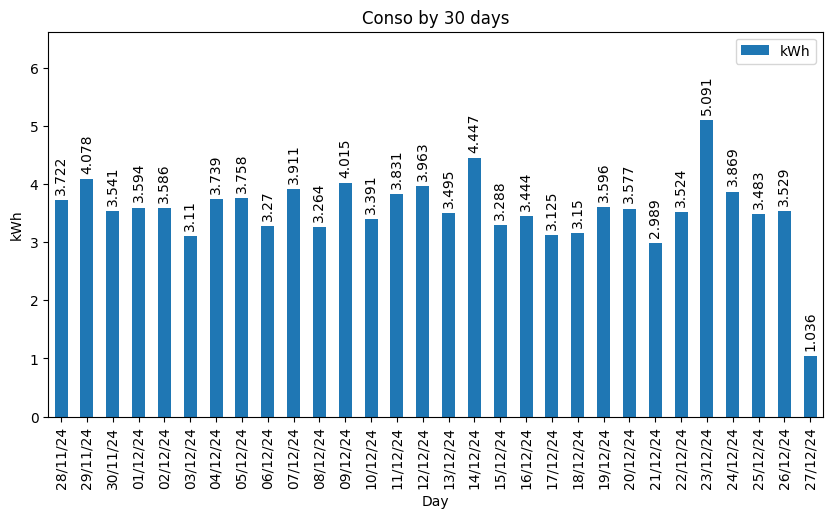

In [1520]:
# Plot the figure with labels.
x_labels = list(df_grp.tail(span)['kWh'])
#x_labels
#fig, ax = plt.subplots(figsize=(2, 2), facecolor='lightskyblue',layout='constrained')
ax = df_grp.tail(span).plot(kind="bar", figsize=(10, 5), layout='tight')
ax.set_title(f"Conso by {span} days")
ax.set_xlabel("Day")
ax.set_ylabel("kWh")
ax.set_ymargin(0.3)
#ax.set_xticklabels(x_labels)
#fig.tight_layout()

rects = ax.patches

# Make some labels.
labels = [x_labels[i] for i in range(len(x_labels))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    #print(height)
    ax.text(
        rect.get_x() + rect.get_width() / 2, height+.1, label, ha="center", va="bottom", rotation=90
    )

#plt.show()

In [1521]:
y_labels = df_grp.tail(span)['kWh']
y_labels

days
28/11/24    3.722
29/11/24    4.078
30/11/24    3.541
01/12/24    3.594
02/12/24    3.586
03/12/24    3.110
04/12/24    3.739
05/12/24    3.758
06/12/24    3.270
07/12/24    3.911
08/12/24    3.264
09/12/24    4.015
10/12/24    3.391
11/12/24    3.831
12/12/24    3.963
13/12/24    3.495
14/12/24    4.447
15/12/24    3.288
16/12/24    3.444
17/12/24    3.125
18/12/24    3.150
19/12/24    3.596
20/12/24    3.577
21/12/24    2.989
22/12/24    3.524
23/12/24    5.091
24/12/24    3.869
25/12/24    3.483
26/12/24    3.529
27/12/24    1.036
Name: kWh, dtype: float64

In [1522]:
x_labels=df_grp.tail(span).index
x_labels

Index(['28/11/24', '29/11/24', '30/11/24', '01/12/24', '02/12/24', '03/12/24',
       '04/12/24', '05/12/24', '06/12/24', '07/12/24', '08/12/24', '09/12/24',
       '10/12/24', '11/12/24', '12/12/24', '13/12/24', '14/12/24', '15/12/24',
       '16/12/24', '17/12/24', '18/12/24', '19/12/24', '20/12/24', '21/12/24',
       '22/12/24', '23/12/24', '24/12/24', '25/12/24', '26/12/24', '27/12/24'],
      dtype='object', name='days')

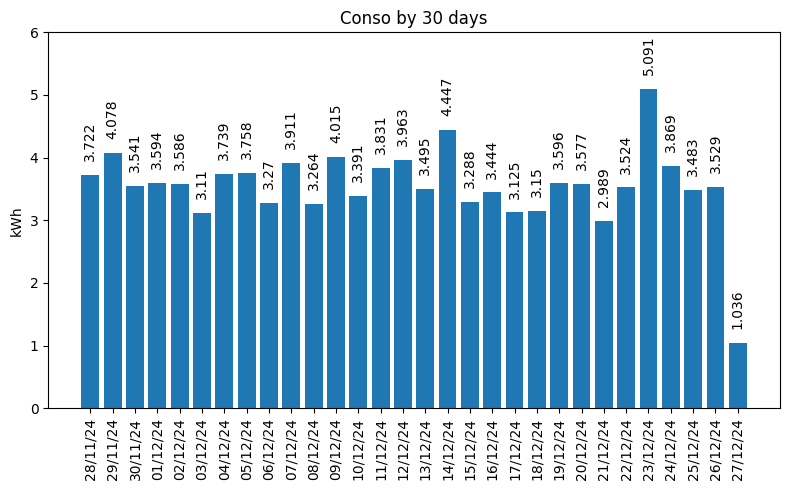

In [1523]:
# Plot the figure with labels
# using bar_label
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html#sphx-glr-gallery-lines-bars-and-markers-bar-label-demo-py
fig, ax = plt.subplots(figsize=(8, 5), layout='tight')
bar_container = ax.bar(x_labels, y_labels)
#ax.set_xticks(x_labels, rotation=45)
ax.bar_label(bar_container, rotation=90, padding=10) #, fmt='{:,.0f}')
ax.set(ylabel='kWh', title=f'Conso by {span} days', ylim=(0, 6))
plt.xticks(rotation=90);


In [1524]:
# figure manager

current=plt.get_current_fig_manager()
current.set_window_title('Conso by day')
#help(current.canvas)
#,facecolor='darkcyan')
#plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
#plt.style.use('dark_background')


<Figure size 640x480 with 0 Axes>

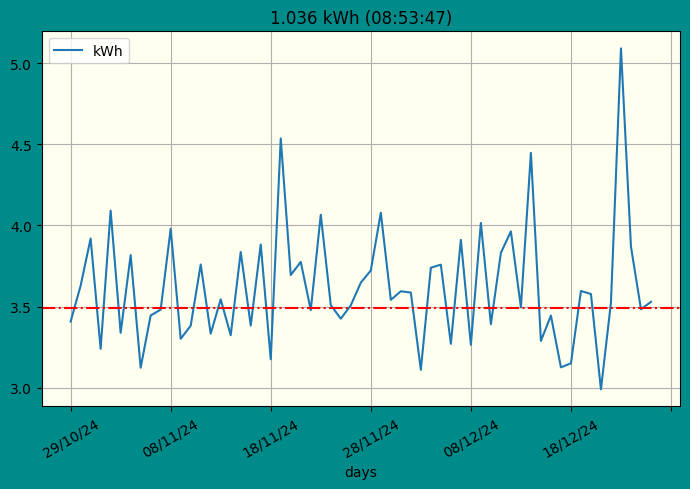

In [1525]:
# pandas plot the day consos in the group
fig, ax = plt.subplots(facecolor='darkcyan', figsize=(7, 5), layout='tight')  # as argument
#or fig.patch.set_facecolor('darkcyan') # This changes the grey to white
ax.set_facecolor("ivory")

# 2 last months
df_grp.iloc[-60:-1].plot(grid=True,ax=ax, y=["kWh"])   #df.plot(x="Name", y=["Age", "Height(in cm)"], kind="bar", ax=ax)
plt.title(str(last)+' kWh ('+str(here)+')')
plt.axhline(y=np.nanmean(df_grp),c='red', ls='-.')
plt.xticks(rotation=30);  # https://ipython.readthedocs.io/en/stable/interactive/tips.html


C:\Users\jean\AppData\Roaming\Python\Python312\site-packages\IPython\core\displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


Text(0.5, 1.0, 'Variations journalières')

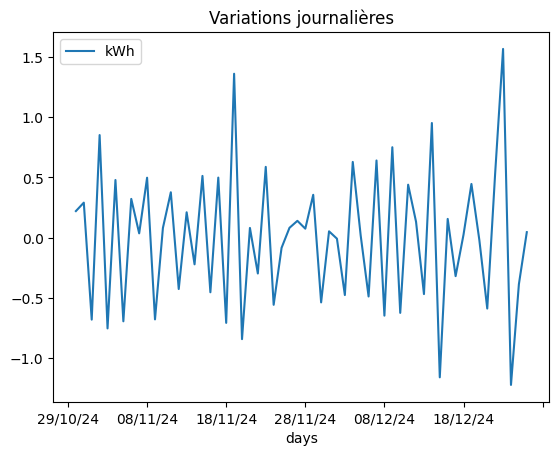

In [1526]:
# variations journalières
df_grp.iloc[-60:-1].diff().plot()
plt.title('Variations journalières')

# Data from 21/08/23

In [1527]:
# add hours column for conso_data (from 21/08/2023)
conso_days = conso_data.copy()
conso_days['hours']= conso_days['dates'].dt.strftime('%H')
conso_days

,Interval,kWh,sec,Wh,cumul(ms),dates,days,hours
0,21934,0.16,21.934,164.128750,21934,2023-08-21 20:10:14.585976,21/08/23,20
1,21858,0.16,21.858,164.699424,43792,2023-08-21 20:10:36.443976,21/08/23,20
2,22001,0.16,22.001,163.628926,65793,2023-08-21 20:10:58.444976,21/08/23,20
3,21928,0.16,21.928,164.173659,87721,2023-08-21 20:11:20.372976,21/08/23,20
4,21891,0.16,21.891,164.451144,109612,2023-08-21 20:11:42.263976,21/08/23,20
...,...,...,...,...,...,...,...,...
1728681,26630,0.14,26.630,135.185881,42640881549,2024-12-27 08:51:14.200976,27/12/24,08
1728682,26719,0.13,26.719,134.735581,42640908268,2024-12-27 08:51:40.919976,27/12/24,08
1728683,26653,0.14,26.653,135.069223,42640934921,2024-12-27 08:52:07.572976,27/12/24,08
1728684,26766,0.13,26.766,134.498991,42640961687,2024-12-27 08:52:34.338976,27/12/24,08


In [1528]:
# example groupby with apply
df = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
                              'Parrot', 'Parrot'],
                   'Max Speed': [380., 370., 24., 26.]})
df.groupby("Animal", group_keys=True)[['Max Speed']].apply(lambda x: x)
      

Max Speed
Animal             
Falcon 0      380.0
       1      370.0
Parrot 2       24.0
       3       26.0

In [1529]:
import pandas as pd
df = pd.read_csv(r'C:\Users\jean\Downloads\only-bh-extreme-events-satellite.csv'
                  ,index_col=[0,1,2,3,4]
                  ,header=[0,1,2,3]
                  ,skipinitialspace=True
                  #,tupleize_cols=True
                ) 

df.columns = pd.MultiIndex.from_tuples(df.columns)
df.index.names

FrozenList(['wsid', 'lat', 'lon', 'start', 'prcp_24'])

In [1530]:
index=df.columns.levels[0]
index

Index(['al', 'asn', 'cc', 'chnk', 'ci', 'ciwc', 'clwc', 'd', 'd2m', 'hcc',
       'istl1', 'istl2', 'istl3', 'istl4', 'lcc', 'lsrh', 'mcc', 'msl', 'o3',
       'p53.162', 'p54.162', 'p55.162', 'p56.162', 'p57.162', 'p58.162',
       'p59.162', 'p60.162', 'p61.162', 'p62.162', 'p63.162', 'p64.162',
       'p65.162', 'p66.162', 'p67.162', 'p68.162', 'p69.162', 'p70.162',
       'p71.162', 'p72.162', 'p73.162', 'p74.162', 'p75.162', 'p76.162',
       'p77.162', 'p78.162', 'p79.162', 'p80.162', 'p81.162', 'p82.162',
       'p83.162', 'p84.162', 'p85.162', 'p86.162', 'p87.162', 'p88.162',
       'p89.162', 'p90.162', 'p91.162', 'p92.162', 'pv', 'q', 'r', 'rsn', 'sd',
       'skt', 'sp', 'sr', 'src', 'sst', 'stl1', 'stl2', 'stl3', 'stl4',
       'swvl1', 'swvl2', 'swvl3', 'swvl4', 't', 't2m', 'tcc', 'tco3', 'tcw',
       'tcwv', 'tsn', 'u', 'u10', 'v', 'v10', 'vo', 'w', 'z'],
      dtype='object')

In [1531]:
df_des = pd.DataFrame(
                            index=df.columns.levels[0],
                            columns=['count','mean','std','min','25','50','75','max']
                         )
df_des

,count,mean,std,min,25,50,75,max
al,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
asn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chnk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ci,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
v,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
w,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1532]:
groupallbyday = conso_days[['days','hours','kWh']].groupby(['days'], sort=False)
groupallbyday[['kWh']].count()  #.apply(lambda x: x))

,kWh
days,
21/08/23,696
22/08/23,3701
23/08/23,4231
24/08/23,3677
25/08/23,4124
...,...
23/12/24,5091
24/12/24,3869
25/12/24,3483


In [1533]:
conso_days

,Interval,kWh,sec,Wh,cumul(ms),dates,days,hours
0,21934,0.16,21.934,164.128750,21934,2023-08-21 20:10:14.585976,21/08/23,20
1,21858,0.16,21.858,164.699424,43792,2023-08-21 20:10:36.443976,21/08/23,20
2,22001,0.16,22.001,163.628926,65793,2023-08-21 20:10:58.444976,21/08/23,20
3,21928,0.16,21.928,164.173659,87721,2023-08-21 20:11:20.372976,21/08/23,20
4,21891,0.16,21.891,164.451144,109612,2023-08-21 20:11:42.263976,21/08/23,20
...,...,...,...,...,...,...,...,...
1728681,26630,0.14,26.630,135.185881,42640881549,2024-12-27 08:51:14.200976,27/12/24,08
1728682,26719,0.13,26.719,134.735581,42640908268,2024-12-27 08:51:40.919976,27/12/24,08
1728683,26653,0.14,26.653,135.069223,42640934921,2024-12-27 08:52:07.572976,27/12/24,08
1728684,26766,0.13,26.766,134.498991,42640961687,2024-12-27 08:52:34.338976,27/12/24,08


In [1534]:

# group all by day for all conso_days
groupallbydayhours = conso_days[['days','hours','kWh']].groupby(['days','hours'], sort=False)
# use apply to show the group
groupallbydayhours[['days','hours','kWh']].apply(lambda x: x)


days hours   kWh
days     hours                              
21/08/23 20    0        21/08/23    20  0.16
               1        21/08/23    20  0.16
               2        21/08/23    20  0.16
               3        21/08/23    20  0.16
               4        21/08/23    20  0.16
...                          ...   ...   ...
27/12/24 08    1728681  27/12/24    08  0.14
               1728682  27/12/24    08  0.13
               1728683  27/12/24    08  0.14
               1728684  27/12/24    08  0.13
               1728685  27/12/24    08  0.13

[1728686 rows x 3 columns]

In [1535]:
groupallbyday.indices.keys()

dict_keys(['21/08/23', '22/08/23', '23/08/23', '24/08/23', '25/08/23', '26/08/23', '27/08/23', '28/08/23', '29/08/23', '30/08/23', '31/08/23', '01/09/23', '02/09/23', '03/09/23', '04/09/23', '05/09/23', '06/09/23', '07/09/23', '08/09/23', '09/09/23', '10/09/23', '11/09/23', '12/09/23', '13/09/23', '14/09/23', '15/09/23', '16/09/23', '17/09/23', '18/09/23', '19/09/23', '20/09/23', '21/09/23', '22/09/23', '23/09/23', '24/09/23', '25/09/23', '26/09/23', '27/09/23', '28/09/23', '29/09/23', '30/09/23', '01/10/23', '02/10/23', '03/10/23', '04/10/23', '05/10/23', '06/10/23', '07/10/23', '08/10/23', '09/10/23', '10/10/23', '11/10/23', '12/10/23', '13/10/23', '14/10/23', '15/10/23', '16/10/23', '17/10/23', '18/10/23', '19/10/23', '20/10/23', '21/10/23', '22/10/23', '23/10/23', '24/10/23', '25/10/23', '26/10/23', '27/10/23', '28/10/23', '29/10/23', '30/10/23', '31/10/23', '01/11/23', '02/11/23', '03/11/23', '04/11/23', '05/11/23', '06/11/23', '07/11/23', '08/11/23', '09/11/23', '10/11/23', '11/1

In [1536]:
groupallbydayhours.indices.keys()

dict_keys([('21/08/23', '20'), ('21/08/23', '21'), ('21/08/23', '22'), ('21/08/23', '23'), ('22/08/23', '20'), ('22/08/23', '21'), ('22/08/23', '22'), ('22/08/23', '23'), ('22/08/23', '00'), ('22/08/23', '01'), ('22/08/23', '02'), ('22/08/23', '03'), ('22/08/23', '04'), ('22/08/23', '05'), ('22/08/23', '06'), ('22/08/23', '07'), ('22/08/23', '08'), ('22/08/23', '09'), ('22/08/23', '10'), ('22/08/23', '11'), ('22/08/23', '12'), ('22/08/23', '13'), ('22/08/23', '14'), ('22/08/23', '15'), ('22/08/23', '16'), ('22/08/23', '17'), ('22/08/23', '18'), ('22/08/23', '19'), ('23/08/23', '20'), ('23/08/23', '21'), ('23/08/23', '22'), ('23/08/23', '23'), ('23/08/23', '00'), ('23/08/23', '01'), ('23/08/23', '02'), ('23/08/23', '03'), ('23/08/23', '04'), ('23/08/23', '05'), ('23/08/23', '06'), ('23/08/23', '07'), ('23/08/23', '08'), ('23/08/23', '09'), ('23/08/23', '10'), ('23/08/23', '11'), ('23/08/23', '12'), ('23/08/23', '13'), ('23/08/23', '14'), ('23/08/23', '15'), ('23/08/23', '16'), ('23/08/2

In [1537]:
grp_by_day = groupallbyday.count()
grp_by_day

,hours,kWh
days,,
21/08/23,696,696
22/08/23,3701,3701
23/08/23,4231,4231
24/08/23,3677,3677
25/08/23,4124,4124
...,...,...
23/12/24,5091,5091
24/12/24,3869,3869
25/12/24,3483,3483


In [1538]:
grp_by_day['kWh'].cumsum()

days
21/08/23        696
22/08/23       4397
23/08/23       8628
24/08/23      12305
25/08/23      16429
             ...   
23/12/24    1716769
24/12/24    1720638
25/12/24    1724121
26/12/24    1727650
27/12/24    1728686
Name: kWh, Length: 495, dtype: int64

In [1539]:
grp_by_dayhours = groupallbydayhours.count()
grp_by_dayhours

kWh
days     hours     
21/08/23 20     150
         21     286
         22     130
         23     130
22/08/23 00     130
...             ...
27/12/24 04     111
         05     102
         06     108
         07     111
         08     160

[11845 rows x 1 columns]

In [1540]:
grp_by_dayhours['kWh'].cumsum()

days      hours
21/08/23  20           150
          21           436
          22           566
          23           696
22/08/23  00           826
                    ...   
27/12/24  04       1728205
          05       1728307
          06       1728415
          07       1728526
          08       1728686
Name: kWh, Length: 11845, dtype: int64

In [1541]:
grp_by_dayhours['cumsum'] = grp_by_dayhours.groupby(level=0)['kWh'].cumsum()
grp_by_dayhours['diff'] = grp_by_dayhours.groupby(level=0)['kWh'].diff()
# or
grp_by_dayhours['cumsum'] = grp_by_dayhours.groupby(['days'])['kWh'].cumsum()
grp_by_dayhours['diff'] = grp_by_dayhours.groupby(['days'])['kWh'].diff()
grp_by_dayhours

kWh  cumsum   diff
days     hours                    
21/08/23 20     150     150    NaN
         21     286     436  136.0
         22     130     566 -156.0
         23     130     696    0.0
22/08/23 00     130     130    NaN
...             ...     ...    ...
27/12/24 04     111     555    0.0
         05     102     657   -9.0
         06     108     765    6.0
         07     111     876    3.0
         08     160    1036   49.0

[11845 rows x 3 columns]

In [1542]:
today, grp_by_dayhours.loc[today]

('27/12/24',
        kWh  cumsum  diff
 hours                   
 00     113     113   NaN
 01     110     223  -3.0
 02     110     333   0.0
 03     111     444   1.0
 04     111     555   0.0
 05     102     657  -9.0
 06     108     765   6.0
 07     111     876   3.0
 08     160    1036  49.0)

Text(0.5, 1.0, 'Cumul journalier')

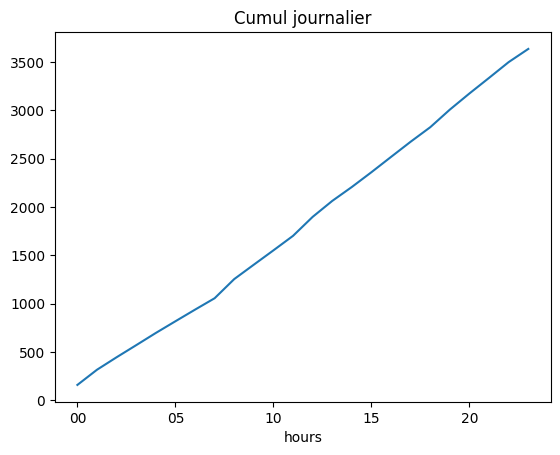

In [1543]:
# progression sans surprise
grp_by_dayhours.loc['26/08/24']['cumsum'].plot()
plt.title('Cumul journalier')

Text(0.5, 1.0, 'Variation horaire')

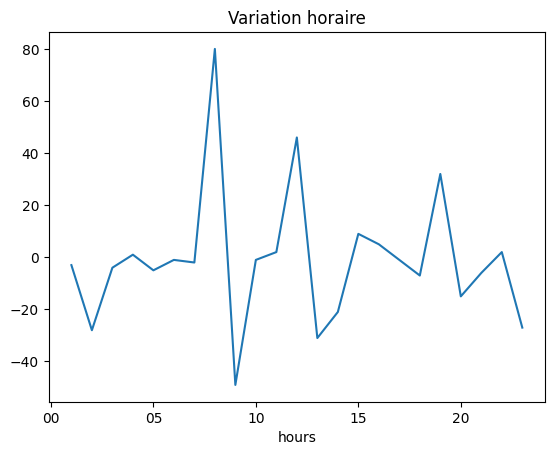

In [1544]:
# plus parlant
grp_by_dayhours.loc['26/08/24']['diff'].plot()
plt.title(r'Variation horaire')

In [1545]:
# count number of days since 21/08/2023
# https://stackoverflow.com/questions/45972388/count-my-multi-index-length-in-a-dataframe-pandas
n = len(grp_by_dayhours.index.levels[0].unique())
# or
n = len(grp_by_dayhours.index.levels[0])
# or
n = grp_by_dayhours.index.levshape[0]  # levshape -> (371,24)
n

495

In [1546]:
df_grp.tail(n)['kWh'].describe()


count    495.000000
mean       3.492295
std        0.695345
min        0.696000
25%        3.337000
50%        3.612000
75%        3.870000
max        5.097000
Name: kWh, dtype: float64

In [1547]:
maxday = df_grp.tail(n)['kWh'].idxmax()

Text(0.5, 1.0, '495 days')

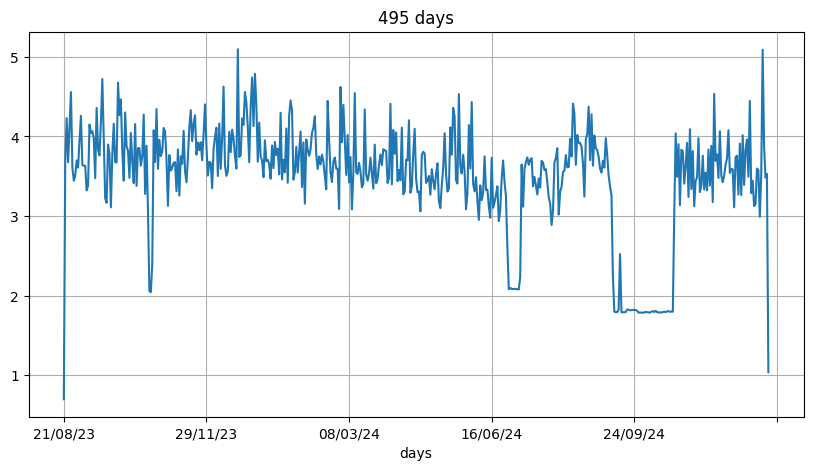

In [1548]:
# show conso in span 
span = n
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

Text(0.5, 1.0, '400 days')

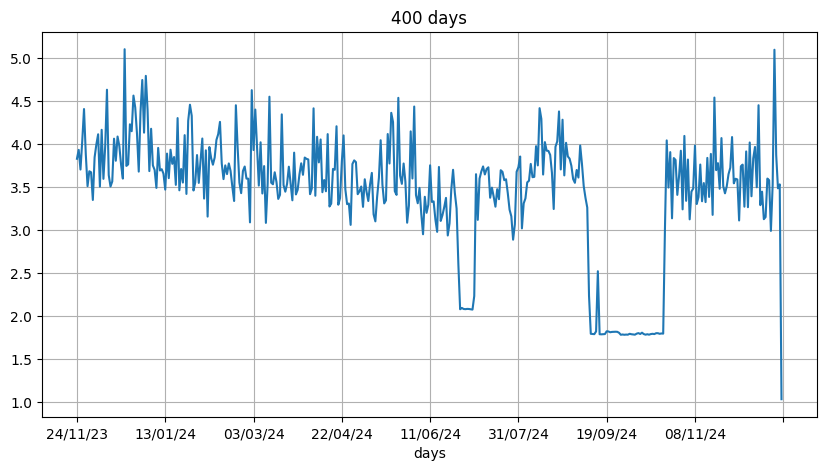

In [1549]:
# show conso in span 
span = 400
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

In [1550]:
df_grp['kWh']

days
21/08/23    0.696
22/08/23    3.701
23/08/23    4.231
24/08/23    3.677
25/08/23    4.124
            ...  
23/12/24    5.091
24/12/24    3.869
25/12/24    3.483
26/12/24    3.529
27/12/24    1.036
Name: kWh, Length: 495, dtype: float64

In [1551]:
df_grp.describe()

,kWh
count,495.000000
mean,3.492295
std,0.695345
min,0.696000
25%,3.337000
50%,3.612000
75%,3.870000
max,5.097000


array([[<Axes: title={'center': 'kWh'}>]], dtype=object)

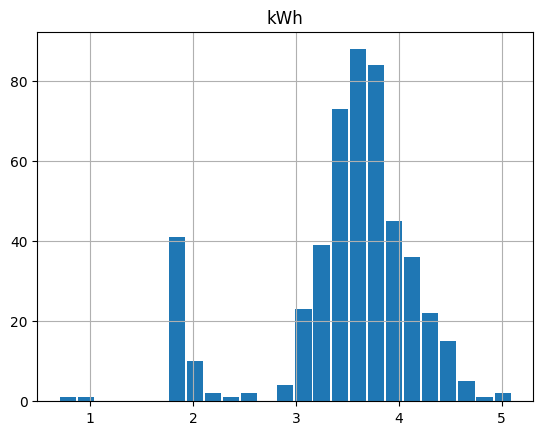

In [1552]:
# répartition des consos de 1 à 5 kWh par jour
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
# histtype{'bar', 'barstacked', 'step', 'stepfilled'}, default: 'bar'
df_grp.hist(bins=25, density=False, histtype='bar',rwidth=0.9, align='mid')

In [1553]:
df_grp.tail(span)['kWh']

days
24/11/23    3.826
25/11/23    3.929
26/11/23    3.701
27/11/23    4.032
28/11/23    4.403
            ...  
23/12/24    5.091
24/12/24    3.869
25/12/24    3.483
26/12/24    3.529
27/12/24    1.036
Name: kWh, Length: 400, dtype: float64

# Conso par heure

In [1554]:
day

'27/12/24'

In [1555]:
grp_by_dayhours.loc[day]

,kWh,cumsum,diff
hours,,,
00,113,113,NaN
01,110,223,-3.0
02,110,333,0.0
03,111,444,1.0
04,111,555,0.0
05,102,657,-9.0
06,108,765,6.0
07,111,876,3.0
08,160,1036,49.0


In [1556]:
# select a day to plot
day = '02/07/24'
day = today
len(grp_by_dayhours.loc[day])


9

In [1557]:
l = range(1,len(grp_by_dayhours.loc[day])+1)
l

range(1, 10)

In [1558]:
grp_by_dayhours.loc[day,'days'] = l #ist(1,len(grp_by_day.loc[day])+1)

In [1559]:
grp_by_dayhours.loc[day,'days'].values

array([1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [1560]:
grp_by_dayhours.loc[day,'days']

hours
00    1.0
01    2.0
02    3.0
03    4.0
04    5.0
05    6.0
06    7.0
07    8.0
08    9.0
Name: days, dtype: float64

In [1561]:
### ????????????????????????
grp_by_dayhours.loc[day,'days'] = grp_by_dayhours.loc[day,'days'].values.astype('int64')

In [1562]:
grp_by_dayhours.loc[day].info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 00 to 08
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kWh     9 non-null      int64  
 1   cumsum  9 non-null      int64  
 2   diff    8 non-null      float64
 3   days    9 non-null      float64
dtypes: float64(2), int64(2)
memory usage: 360.0+ bytes


In [1563]:
grp_by_dayhours.loc[day,'days']

hours
00    1.0
01    2.0
02    3.0
03    4.0
04    5.0
05    6.0
06    7.0
07    8.0
08    9.0
Name: days, dtype: float64

In [1564]:
day

'27/12/24'

In [1565]:
grp_by_dayhours.loc[day]

,kWh,cumsum,diff,days
hours,,,,
00,113,113,NaN,1.0
01,110,223,-3.0,2.0
02,110,333,0.0,3.0
03,111,444,1.0,4.0
04,111,555,0.0,5.0
05,102,657,-9.0,6.0
06,108,765,6.0,7.0
07,111,876,3.0,8.0
08,160,1036,49.0,9.0


Text(0.5, 1.0, '27/12/24')

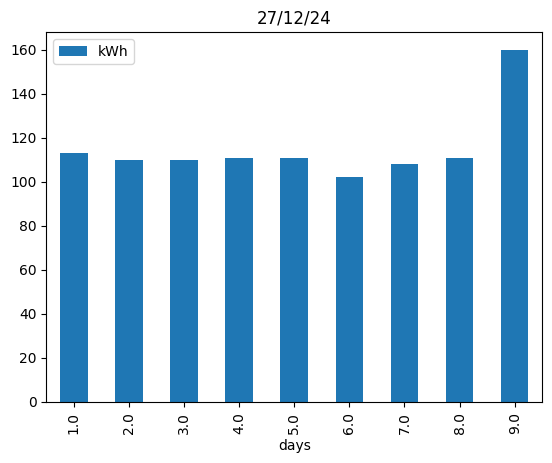

In [1566]:
grp_by_dayhours.loc[day][['days','kWh']].plot.bar(x='days')
plt.title(f'{day}')

In [1567]:
grp_by_dayhours.loc[day].index

Index(['00', '01', '02', '03', '04', '05', '06', '07', '08'], dtype='object', name='hours')

# Conso du jour


In [1568]:
groupedbyhour.count()

,kWh
hours,
00,113
01,110
02,110
03,111
04,111
05,102
06,108
07,111
08,160


In [1569]:
day = '09/09/24'
day = maxday
#day = today
grp_by_dayhours.loc[day].kWh

hours
00    156
01    166
02    152
03    169
04    165
05    148
06    138
07    115
08    131
09    130
10    114
11    131
12    120
13    178
14    155
15    139
16    157
17    986
18    219
19    285
20    297
21    315
22    324
23    207
Name: kWh, dtype: int64

In [1570]:
def conso_by_hour(day):
    global data
    # conso by hour
    #data = groupedbyhour.count().kWh
    data = grp_by_dayhours.loc[day].kWh

    # len(groupedbyhour)
    x = np.arange(1,len(data)+1)
    ymax = max(data)+5
    #groupedbyhour.count().plot(grid=True,xticks=x)
    fig, ax = plt.subplots(figsize=(8, 5), facecolor='darkcyan')

    plt.bar(x,data)
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) {day} - Total {sum(data)}')
    plt.xlim(0,len(x)+1)
    #plt.xticks(rotation=30);
    #plt.ylim(0,ymax)

    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in data]
    fontfamily = {'calibri', 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom",
            fontfamily=fontfamily, fontsize=10, fontweight='bold', color='red'
        )


# 100 days

299.02

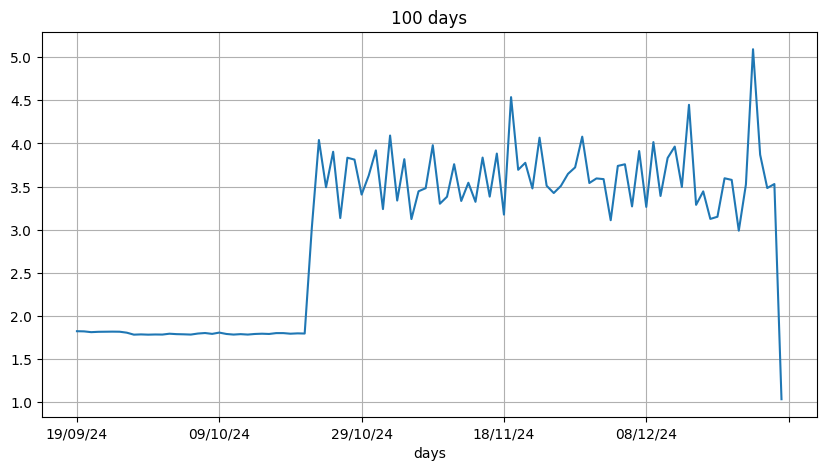

In [1571]:
# show conso in span 
span = 100
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')
sum(df_grp.tail(span)['kWh'])

In [1572]:
df_grp.tail(1)

,kWh
days,
27/12/24,1.036


In [1573]:
span = 1
#df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
#plt.title(f'{span} days')
sum(df_grp.tail(span)['kWh'])

1.036

In [1574]:
#import timeit
#start = timeit.timeit()
#print("hello")
end = time.time()
print(end - start)

102.98433804512024


# Today

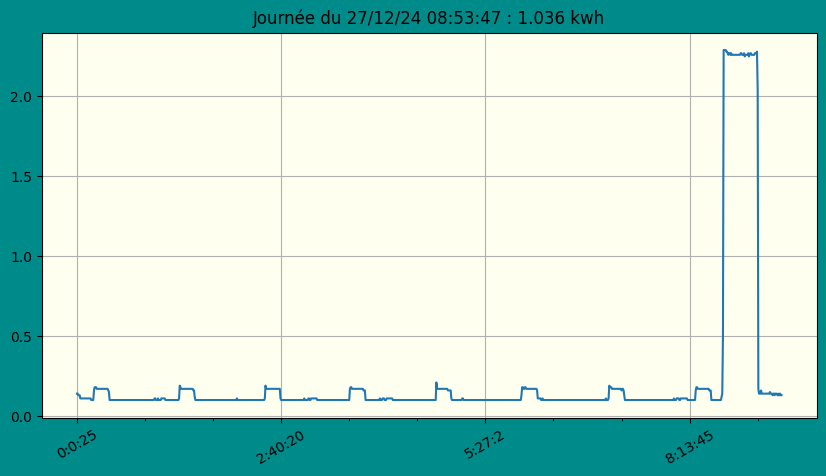

In [1575]:
show(today,bgcolor='ivory')

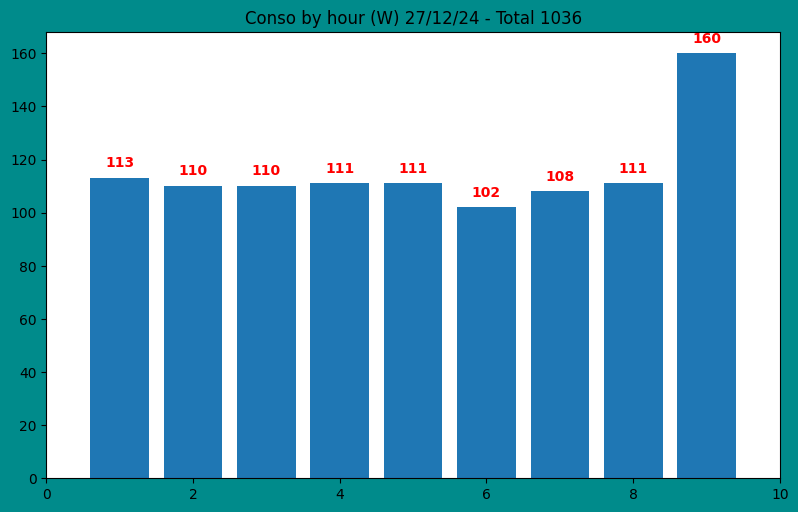

In [1576]:
conso_by_hour(today)

In [1577]:
day = '24/12/24'

('24/12/24', None)

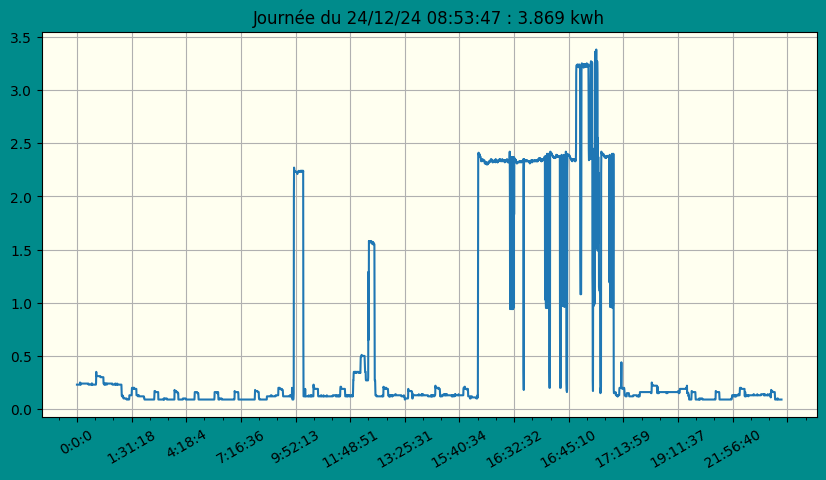

In [1578]:
day, show(day,bgcolor='ivory')

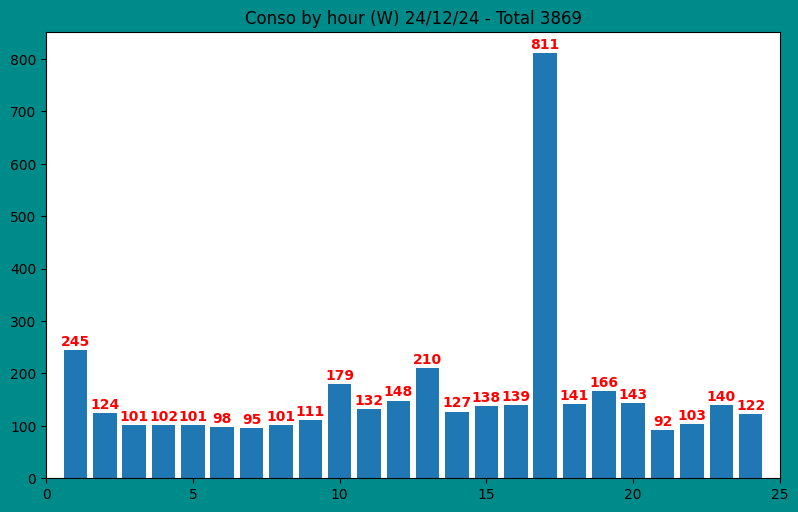

In [1579]:
conso_by_hour(day)

In [1580]:
maxday

'21/12/23'

('21/12/23', None)

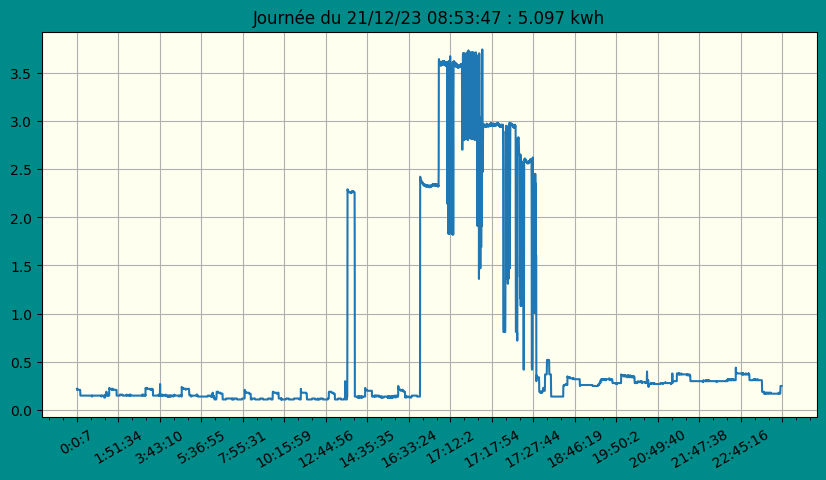

In [1581]:
# retour vietnam 22/10/2024
#day = '22/10/24'
day = maxday
day, show(day,bgcolor='ivory')

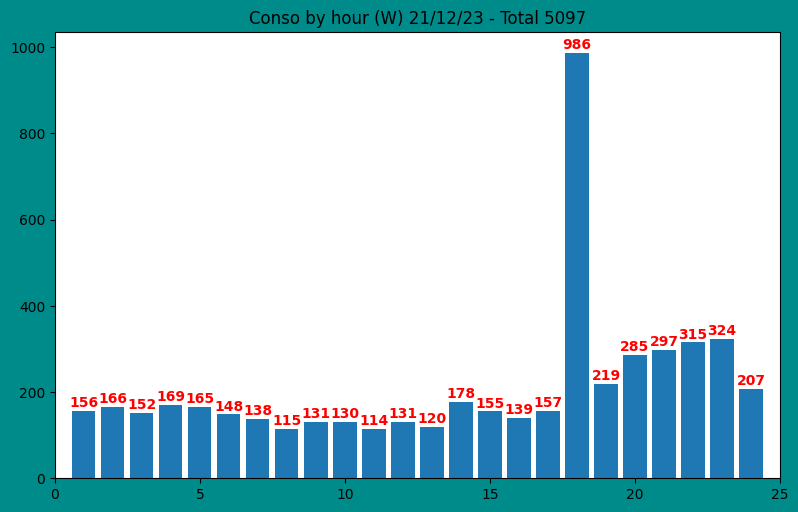

In [1582]:
conso_by_hour(day)

In [1583]:
sum(data)

5097

In [1584]:
diff = grp_by_dayhours.loc[today]
diff


,kWh,cumsum,diff,days
hours,,,,
00,113,113,NaN,1.0
01,110,223,-3.0,2.0
02,110,333,0.0,3.0
03,111,444,1.0,4.0
04,111,555,0.0,5.0
05,102,657,-9.0,6.0
06,108,765,6.0,7.0
07,111,876,3.0,8.0
08,160,1036,49.0,9.0


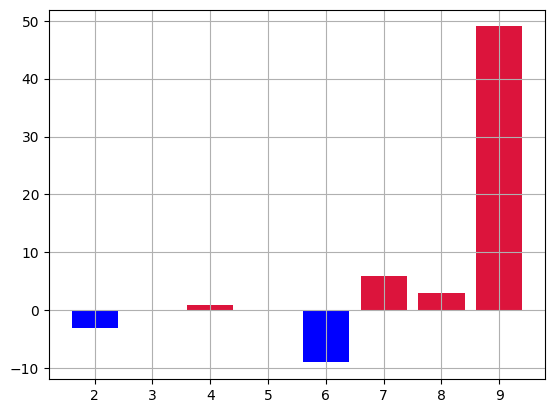

In [1585]:
x = np.arange(1,len(diff)+1)

plt.bar(x,diff['diff'], color=np.where(diff['diff'] > 0, 'crimson', 'blue'))
plt.grid()

In [1586]:
data

hours
00    156
01    166
02    152
03    169
04    165
05    148
06    138
07    115
08    131
09    130
10    114
11    131
12    120
13    178
14    155
15    139
16    157
17    986
18    219
19    285
20    297
21    315
22    324
23    207
Name: kWh, dtype: int64

<Axes: xlabel='hours'>

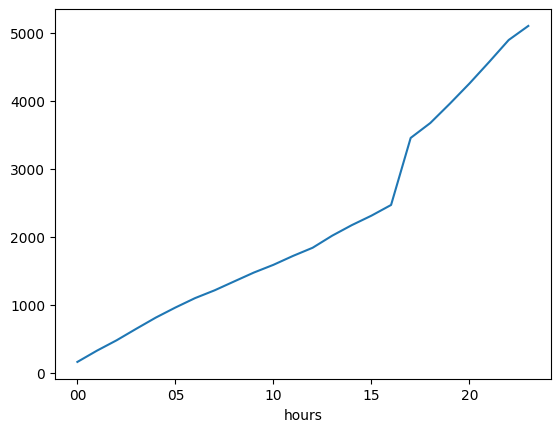

In [1587]:
data.cumsum().plot()


<Axes: xlabel='hours'>

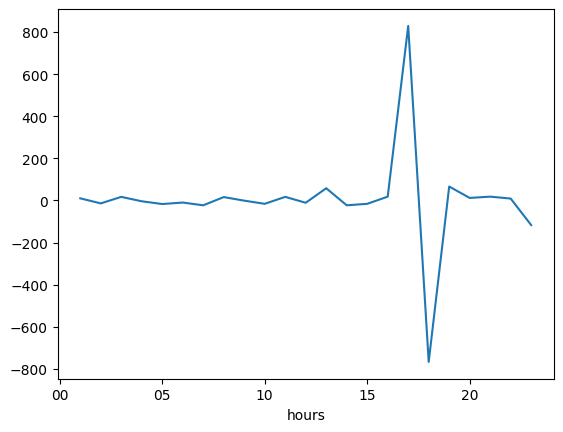

In [1588]:
# evolution par heure
data.diff().plot()

In [1589]:
data.diff().describe()

count     23.000000
mean       2.217391
std      243.172770
min     -767.000000
25%      -16.000000
50%       -1.000000
75%       17.000000
max      829.000000
Name: kWh, dtype: float64

<Axes: >

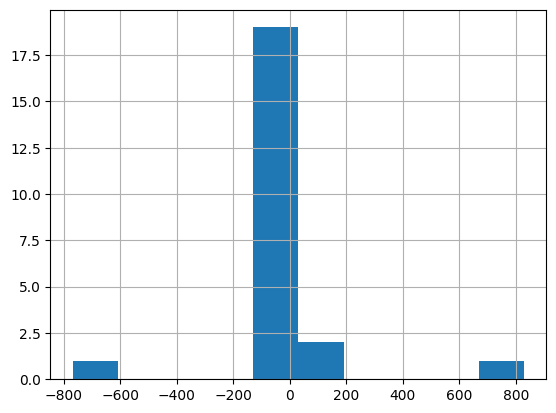

In [1590]:
data.diff().hist()

# Test sauvegarde

In [1591]:
import os
os.listdir(path='.')

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 '5_days_meteo.ipynb',
 '8days.csv',
 '8days.pkl',
 '8days_dump.json',
 '8days_to_json.json',
 'advanced_expression.ipynb',
 'alphabeta_tree.ipynb',
 'amlich.ipynb',
 'amlich5.ipynb',
 'amlich_data.py',
 'amlich_functions.py',
 'amlich_lib.py',
 'AntPath.ipynb',
 'Apple.csv',
 'astronomie_def.ipynb',
 'atom_electronic_configuration.ipynb',
 'average_binding_energy_by_nucleons.ipynb',
 'bar_label.ipynb',
 'bell_curve.ipynb',
 'bitcoin_api.ipynb',
 'bitmap_convert.ipynb',
 'bitmap_structure.ipynb',
 'CAC40.csv',
 'chess_board.ipynb',
 'coindesk_api_client.ipynb',
 'collections.ipynb',
 'colormaps.ipynb',
 'conso.txt',
 'conso_by_hour.ipynb',
 'conso_data.csv',
 'conso_day_from_20230821.csv',
 'conso_jour.csv',
 'conso_jour.png',
 'conso_kwh.ipynb',
 'conso_kwh_reduced.ipynb',
 'conso_par_jour.csv',
 'covid19_france.ipynb',
 'cryptography_fernet.ipynb',
 'csv_readwrite.ipynb',
 'curves.ipynb',
 'dash_app001.ipynb',
 'data_correlation.ipynb',


In [1592]:
# list to store files
res = []
# Iterate directory
for file in os.listdir('.'):
    # check only text files
    if file.endswith('.csv'):
        res.append(file)
        print(file)
#print(res)

8days.csv
Apple.csv
CAC40.csv
conso_data.csv
conso_day_from_20230821.csv
conso_jour.csv
conso_par_jour.csv
data_temp16122022.csv
demain.csv
df.csv
df_grp.csv
DowJones.csv
EURUSD.csv
Ford.csv
karaoke.csv
ligue1_2020_27.csv
Nasdaq.csv
Nikkei.csv
planete.csv
saturn_bodies.csv
saturn_rings.csv
SMSSpamCollection.csv
table-indicateurs-open-data-dep-2023-06-30-17h59.csv
table-indicateurs-open-data-france-2023-06-30-17h59.csv
temp_humidity.csv
Tesla.csv
titanic.csv
Toyota.csv
VNDUSD.csv
WA_Fn-UseC_-Telco-Customer-Churn.csv
week.csv


In [1593]:
#conso_byhour(day)

In [1594]:
# save to file
import pickle
path = r'../consobyhour.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

# plot any day


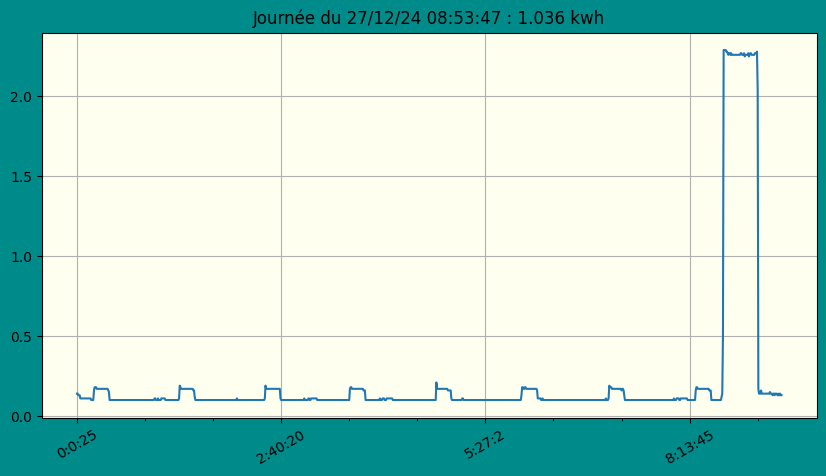

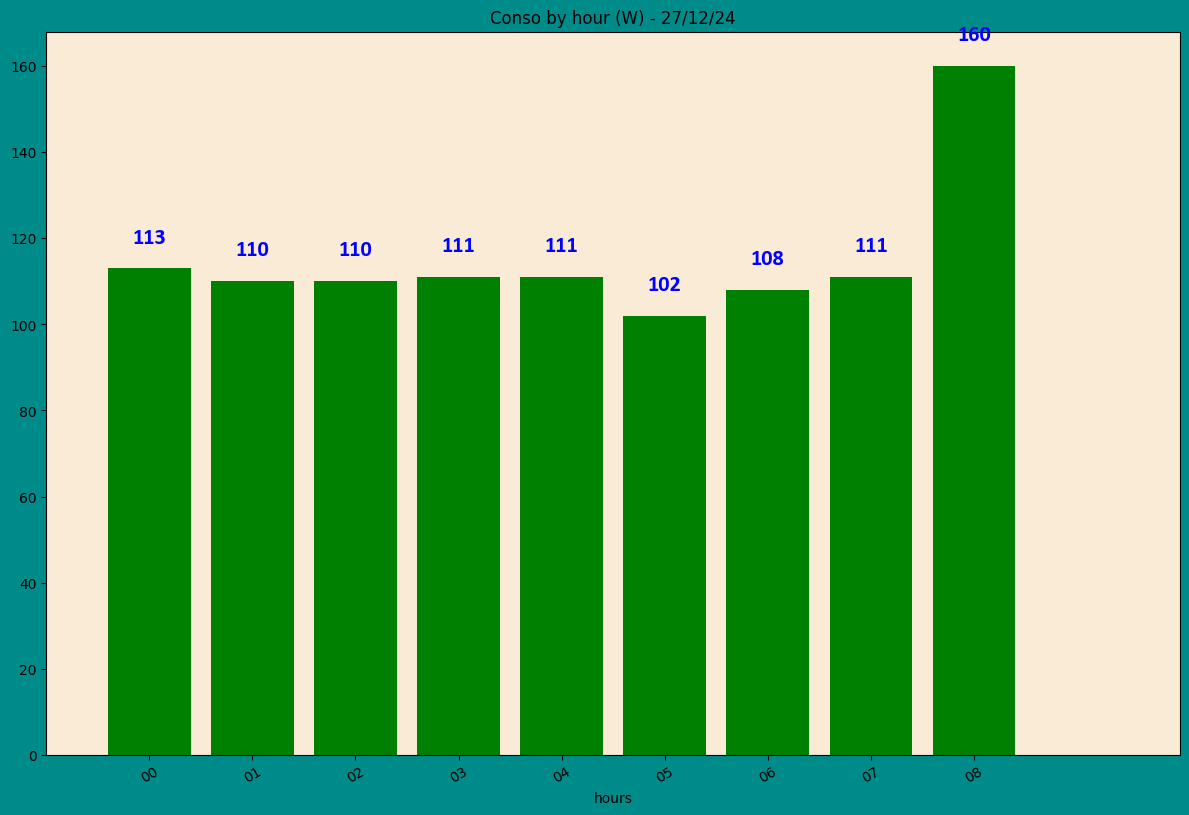

In [1595]:
day = '27/10/24'
day = today
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [1596]:
month.describe()


count    30.000000
mean      3.634233
std       0.423048
min       2.989000
25%       3.404250
50%       3.581500
75%       3.812750
max       5.091000
Name: kWh, dtype: float64

<Axes: >

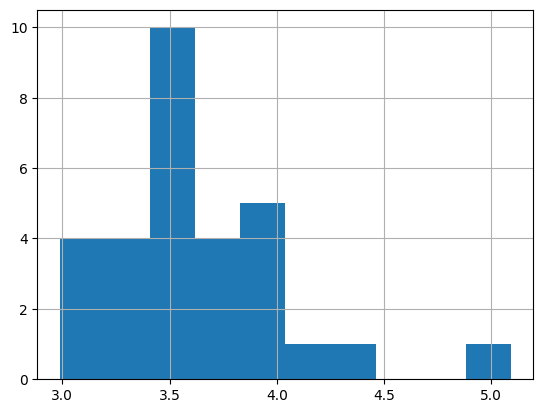

In [1597]:
month.hist()

<Axes: xlabel='days'>

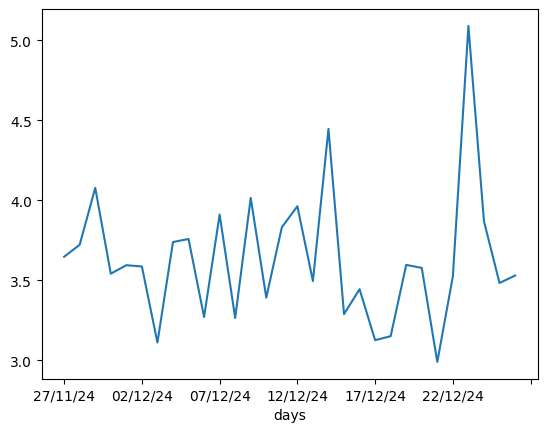

In [1598]:
month.plot()

In [1599]:
# date with max conso in 1 month
month.idxmax()

'23/12/24'

In [1600]:
# plot month day max conso (télévision de 11h à 23h)
day = month.idxmax()
#day = '27/10/2024'
day

'23/12/24'

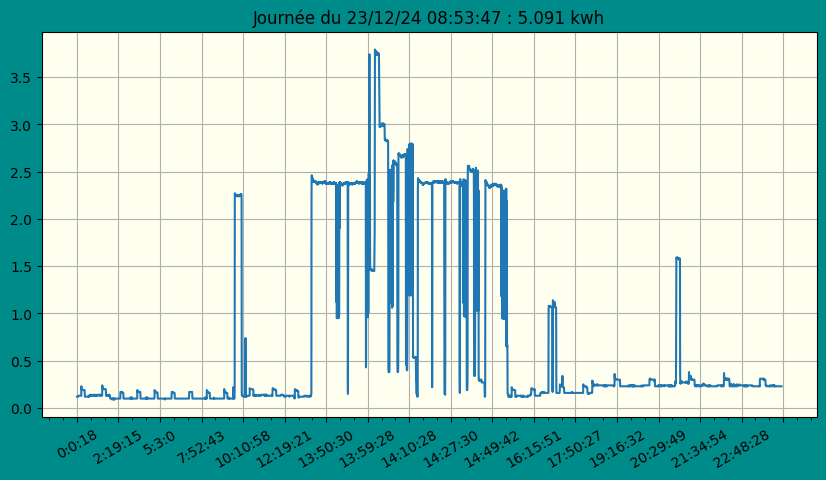

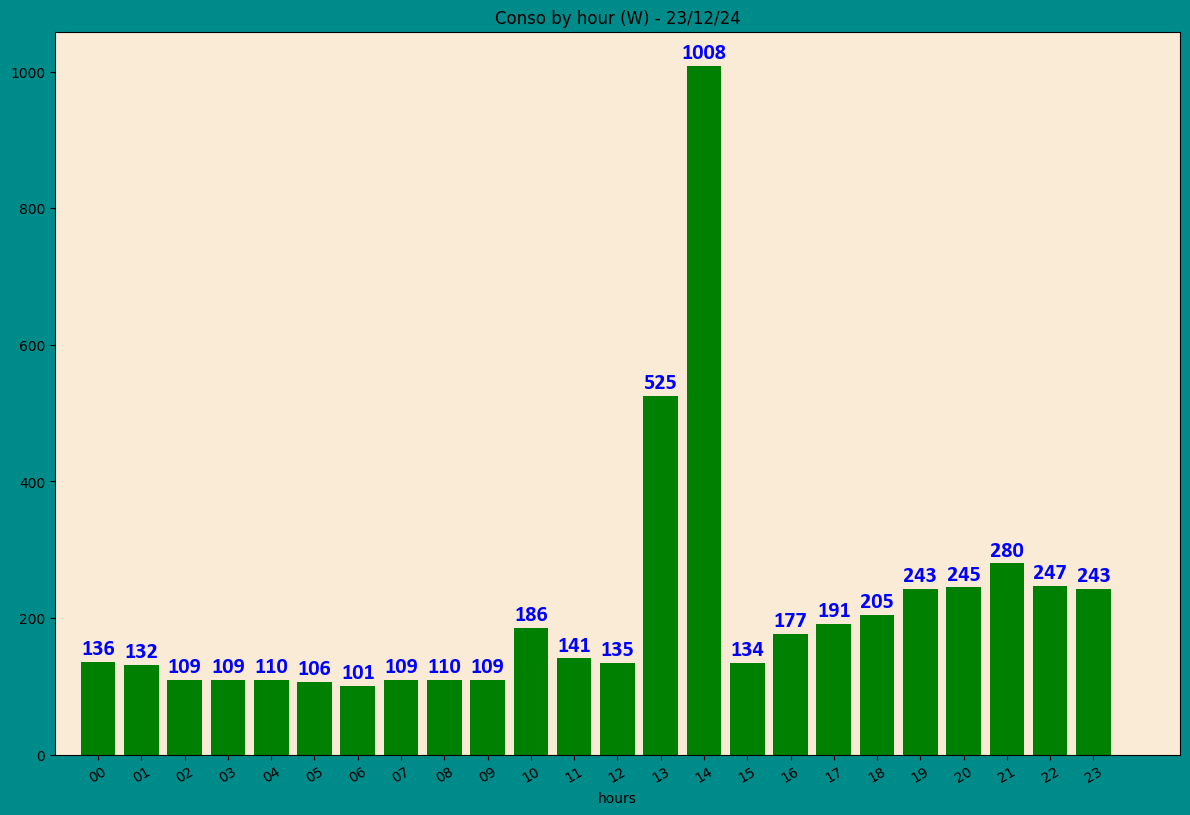

In [1601]:
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [1602]:
grp_by_dayhours

kWh  cumsum   diff  days
days     hours                          
21/08/23 20     150     150    NaN   NaN
         21     286     436  136.0   NaN
         22     130     566 -156.0   NaN
         23     130     696    0.0   NaN
22/08/23 00     130     130    NaN   NaN
...             ...     ...    ...   ...
27/12/24 04     111     555    0.0   5.0
         05     102     657   -9.0   6.0
         06     108     765    6.0   7.0
         07     111     876    3.0   8.0
         08     160    1036   49.0   9.0

[11845 rows x 4 columns]

In [1603]:
grp_by_dayhours.loc[month.idxmax()]

,kWh,cumsum,diff,days
hours,,,,
00,136,136,NaN,NaN
01,132,268,-4.0,NaN
02,109,377,-23.0,NaN
03,109,486,0.0,NaN
04,110,596,1.0,NaN
05,106,702,-4.0,NaN
06,101,803,-5.0,NaN
07,109,912,8.0,NaN
08,110,1022,1.0,NaN


In [1604]:
grp_by_dayhours.columns

Index(['kWh', 'cumsum', 'diff', 'days'], dtype='object')

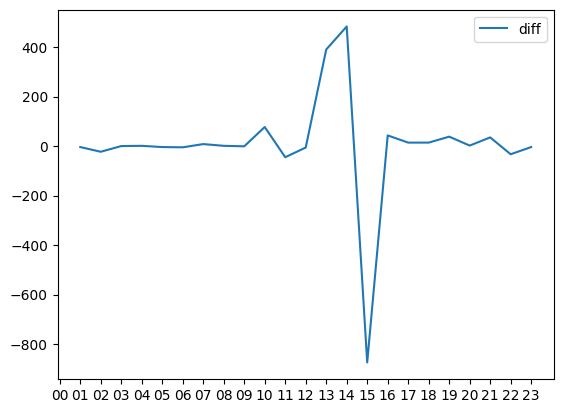

In [1605]:
# diff
plt.plot(grp_by_dayhours.loc[month.idxmax()]['diff'],label=grp_by_dayhours.columns[2])
plt.legend()

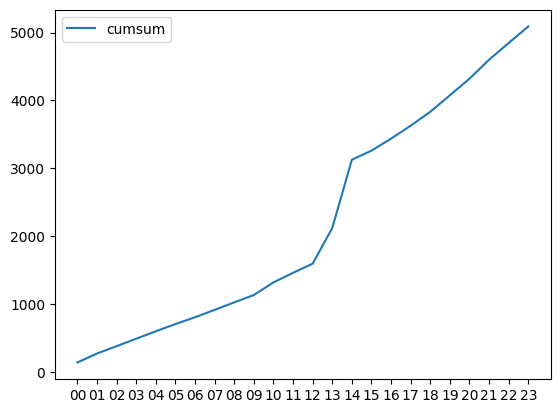

In [1606]:
# cumsum
plt.plot(grp_by_dayhours.loc[month.idxmax()]['cumsum'],label=grp_by_dayhours.columns[1])
plt.legend()

In [1607]:
# 41 s
# file to big to git sync

# create .gitignore
filename=r'../conso_data.csv'
#conso_data.to_csv(filename)
#43.6s size 140128 kB